# Visualization of Particles



This database already contains visualization images of particles rendered using POV-RAY. However, you may wish to change rendering parameters, such as particle and background colors, reference scale, particle orientation ... etc. To meet up needs, the `aggscatpy` package implements a simple interface that can be used to run POV-RAY and then generate a new rendering image of particles. 

## Prerequisites

Since the rendering will be performed using POV-RAY, it has to be installed in advance. Also, to run the command, a povray script (either aggregate.pov or irregular.pov) has to be placed in your working directory. You can find these scripts in aggscatvir/python/povray/, so copy and paste them to the working directory.

## Basic usage

First, we need to import the package:

In [1]:
import aggscatpy

To generate a particle image, we can use the ``particle_rendering`` function:

In [2]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo1',path='./imgs/')

writing ...  ./imgs/geom_demo1.png


where ``partype``, ``size``, ``amon`` are the particle type, particle size, and the monomer radius, respectively. These arguments are the same as those introduced in the previous section. ``ireal`` is a realization number. The command will generate a povray readable file and pass it to POV-RAY automatically. As a result, a .png image will be saved in `./imgs/`.

To check out the produced image, let's define a simple function:

In [3]:
import matplotlib
import matplotlib.pyplot as plt
def show_image(filename):
    try:
        im = plt.imread(filename)
        plt.imshow(im)
        plt.axis('off')
    except FileNotFoundError:
        print('Not such file. Unable to read a particle image.')

The image produced by the above command is

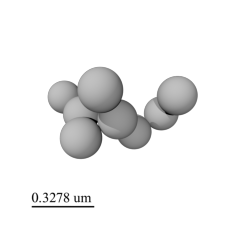

In [4]:
show_image('./imgs/geom_demo1.png')

You can also produce images for irregular grains via

writing ...  ./imgs/geom_demo2.png


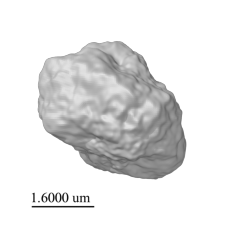

In [5]:
aggscatpy.particle_rendering(partype='grs',size='1_6000',ireal='4',fn='geom_demo2',path='./imgs/')
show_image('./imgs/geom_demo2.png')

## Particle and background colors

We can specify the color of particles by adding ``particle_color='rgb<value,value,value>'`` as an option. The color can be chosen from basic colors (e.g., Red, Green, Blue, Yellow, Cyan, Magenta, Clear, White) or specified with RGB mixing. RGB is a mixture of colors based on the primary colors of light, allowing for fine-tuning of the particle color. The color can be specified in the form of 'rgb<value,value,value>', where each value ranges from 0 to 1. For example, black is 'rgb<0,0,0>', and white is 'rgb<1,1,1>'. When all values of R, G, and B are the same, the color can also be specified simply as 'rgb value'. 

As an example, let's make a yellowish particle:

writing ...  ./imgs/geom_demo3.png


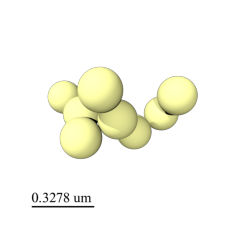

In [6]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo3',path='./imgs/',\
                   particle_color='rgb<0.4,0.4,0.15>')
show_image('./imgs/geom_demo3.png')

By default, the background color is set to transparent. To change the background color, set ``background=True`` and set its color by adding ``bg_color='rgb<value,value,value>'``. ``bgcolor`` can be specified in the same way as the particle color, either by RGB values or by basic colors (e.g., White, Black, Red, Green, Blue, Yellow, Cyan, Magenta, Gray). For example, to have a gray background, the command looks like this:

writing ...  ./imgs/geom_demo4.png


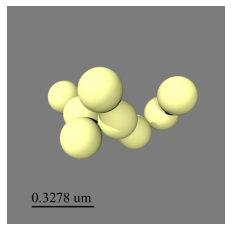

In [7]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo4',path='./imgs/',\
                   particle_color='rgb<0.4,0.4,0.15>', background=True, bg_color='Gray20')
show_image('./imgs/geom_demo4.png')

## Reference bar: position and reference scale

You can modify a reference-scale bar in the image. The default bar length is set to the characteristic radius and the volume-equivalent radius for aggregates and irregular grains, respectively. The physical length of the bar (in units of $\mu\mathrm{m}$) can be directly specified by setting ``reference_length``. The color of the reference bar can also be changed with ``reference_color`` (similar to the particle and background colors). If you want larger text fonts, you can set a magnification rate by ``ref_fontsize`` (to make it large, the value has to be >1.0. Conversely, to make it small, the value should be <1.0).

writing ...  ./imgs/geom_demo5.png


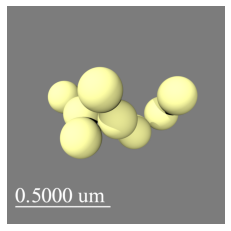

In [8]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo5',path='./imgs/',\
                   particle_color='rgb<0.4,0.4,0.15>', background=True, bg_color='Gray20',\
                   ref_color='White', ref_length=0.5, ref_fontsize=1.5)
show_image('./imgs/geom_demo5.png')

The reference bar is placed on the $y$-$z$ plane ($x=0$) in the rendering coordinate system (*Note:* The system is left-handed). You can change the position of the reference bar, using ``ref_dist`` and ``ref_posang`` (see also the image below). The former and latter set the distance from the origin to the center of the bar (in units of the characteristic radius for aggregates and the volume-equivalent radius for irregular grains) and angle (in degrees) measured from the $z$ axis, respectively.

<img src="reference_bar.png"  width="300">

For example, if you would like to place the bar at the top of the image, set ``ref_posang=90``:

writing ...  ./imgs/geom_demo6.png


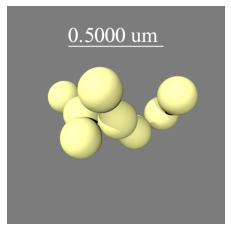

In [9]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo6',path='./imgs/',\
                   particle_color='rgb<0.4,0.4,0.15>', background=True, bg_color='Gray20',\
                   ref_color='White', ref_length=0.5, ref_fontsize=1.5, ref_dist=1.1,ref_posang=90)
show_image('./imgs/geom_demo6.png')

You can hide the reference bar by setting ``reference=False``:

writing ...  ./imgs/geom_demo7.png


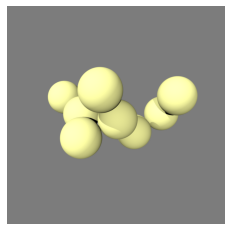

In [10]:
aggscatpy.particle_rendering(partype='CAHP',size='8',amon='100nm',ireal='1',fn='geom_demo7',path='./imgs/',\
                   particle_color='rgb<0.4,0.4,0.15>', background=True, bg_color='Gray20',\
                   reference=False)
show_image('./imgs/geom_demo7.png')

## Camera position and orientation of a particle

You can change the camera's location (observer) and the particle's orientation. The camera is fixed to the $x$ axis of the coordinate system ($x_\mathrm{camera},0,0$) and you can change the distance from the origin to the camera position via ``xcamera``  (in units of the characteristic radius and the volume-equivalent radius for aggregates and irregular grains, respectively). 

You can also rotate the coordinate system about each axis: $x$, $y$, and $z$ (Note that POV-RAY adopts the left-handed system) by using ``rotx``, ``roty``, and ``rotz``, respectively (in units of degrees) (see the image below). 

<img src="camera.png"  width="300">

Here is an example. Let's start with a default parameter:

writing ...  ./imgs/geom_demo8.png


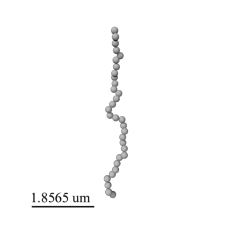

In [11]:
aggscatpy.particle_rendering(partype='FA11',size='32',amon='100nm',ireal='1',fn='geom_demo8',path='./imgs/')
show_image('./imgs/geom_demo8.png')

By setting the ``xcamera`` less than unity, the camera will get closer to the particle than in the default position, and therefore, you will get a closeup image of the particle (I changed the reference scale accordingly):

writing ...  ./imgs/geom_demo9.png


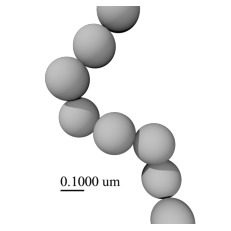

In [12]:
aggscatpy.particle_rendering(partype='FA11',size='32',amon='100nm',ireal='1',fn='geom_demo9',path='./imgs/',\
                  xcamera=0.5, ref_length=0.1, ref_fontsize=1.0, ref_dist=0.2)
show_image('./imgs/geom_demo9.png')

Let's get the camera back to the original position, and next set ``rotx=45``: 

writing ...  ./imgs/geom_demo10.png


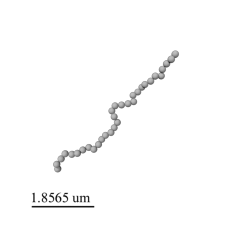

In [13]:
aggscatpy.particle_rendering(partype='FA11',size='32',amon='100nm',ireal='1',fn='geom_demo10',path='./imgs/',\
                rotx=45)
show_image('./imgs/geom_demo10.png')

Since the coordinate system was rotated 45 degrees around the $x$ axis (counterclockwise), the aggregate gets rotated by the same angle clockwise.